In [223]:
#Importiranje na potrebnite biblioteki
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd
import numpy as np 
from scipy import stats 
from sklearn import datasets 
from sklearn.naive_bayes import GaussianNB 
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn.model_selection import train_test_split
%matplotlib notebook
import warnings
warnings.filterwarnings("ignore")

### Analiza i predviduvanje na podatocen set za heart attack 

In [200]:
#Izbiram dataset za analiza i predikcija na mozen srcev udar od sledniot link (od stranata koja ni ja posocivte):
# https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset

column_names = np.loadtxt(open(r"C:\Users\private\Desktop\heart.csv", "rb"), delimiter=",", max_rows=1, dtype = str)
data = np.loadtxt(open(r"C:\Users\private\Desktop\heart.csv", "rb"), delimiter=",", skiprows=1, dtype = str) 

d = pd.read_csv(r"C:\Users\private\Desktop\heart.csv")
d.head() #gi pretstavuvam prvite nekolku primeroci od podatocnoto mnozestvo

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [201]:
d.info()
#informacii za dataset-ot kako broj na redici i koloni, podatocen tip za vrednostite od sekoja kolona, broj na nenulti podatoci za sekoja kolona (kako sto gledame podatocnoto mnozestvo ne sodrzi nulti podatoci) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [202]:
X = data[:,:-1].astype(np.float) #X matricata se odnesuva na vleznite labelirani primeroci taka sto sekoj red pretstavuva eden primerok od mnozestvoto a sekoja kolona pretstavuva eden feature (pr. holesterol)
y = data[:,-1].astype(np.int) #y vektorot se odnesuva na labeliranite izlezi, za sekoj primerok pooddelno

target_names = ["nemal srcev udar","imal srcev udar"]
feature_names = column_names[0:-1]

number_of_features = X.shape[1]
number_of_classes = len(np.unique(y))

print("Broj na izlezni klasi i naziv:", len(np.unique(y)), target_names) #Vrakja kolku izlezni klasi imame vo ramkite na problemot i koi se nivnite imenuvanja
print("Broj i iminja na features:", X.shape[1], feature_names) #Features za dataset-ot ednakvi na kolonite na X matricata
print("Broj na primeroci:", X.shape[0]) #Broj na primeroci kolku sto ima redici vo X matricata

Broj na izlezni klasi i naziv: 2 ['nemal srcev udar', 'imal srcev udar']
Broj i iminja na features: 13 ['age' 'sex' 'cp' 'trtbps' 'chol' 'fbs' 'restecg' 'thalachh' 'exng'
 'oldpeak' 'slp' 'caa' 'thall']
Broj na primeroci: 303


In [203]:
#Setiranje na vizuelizaciskite vrednosti koi ke gi koristime za plotting
colors = ['darkorange','navy']

<IPython.core.display.Javascript object>


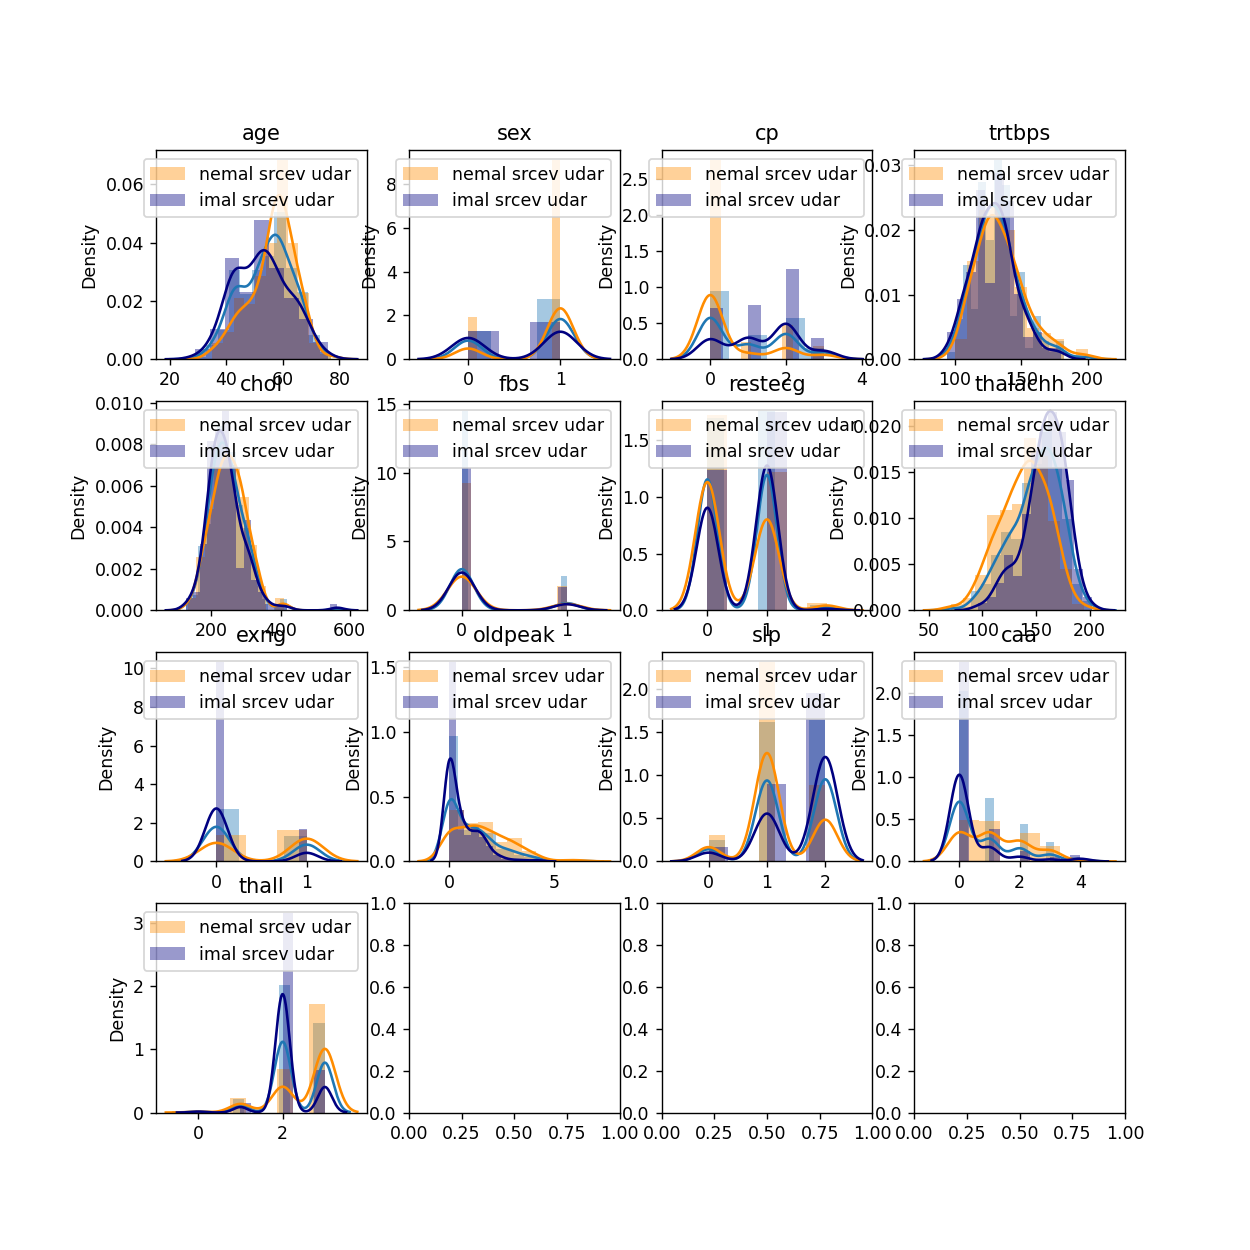

In [204]:
#Najprvo pravime histogram za sekoja navedena karakteristika
fig = plt.figure(figsize=(10, 10))
fig.subplots(nrows=4, ncols=4)
for feat_i in range(number_of_features): #Za sekoja karakteristika subplot
    ax = plt.subplot(4,4, feat_i+1)
    plt.title(feature_names[feat_i]) 
    sns.distplot(X[:,feat_i]) #Histogram za karakteristikata feat_i taka sto gi zemame podatocite od i-tata kolona (za soodvetnata karakteristika) X[:,feat_i] 
    for class_i in range(number_of_classes): #Within-class histograms za karakteristikata
        sns.distplot(X[y == class_i,feat_i], color=colors[class_i], label=target_names[class_i]) 
    plt.legend()
plt.show()

<IPython.core.display.Javascript object>


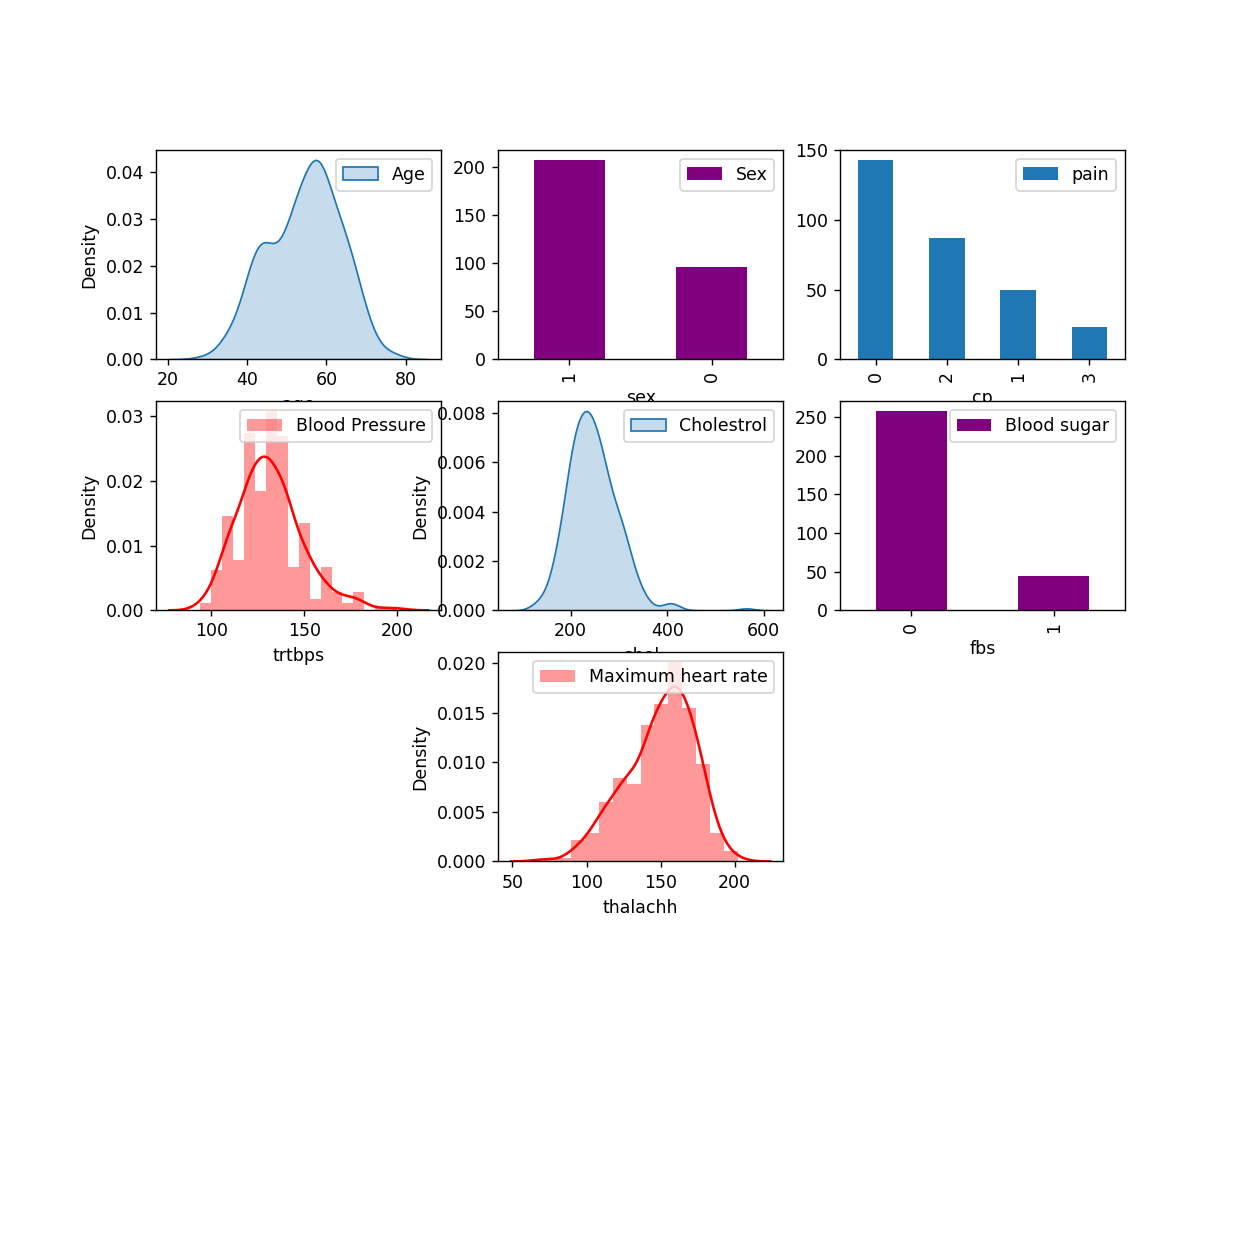

In [205]:
#Soodvetno gi pretstavuvam del od distribuciite za karakteristikite
#Moze da se zabelezi od distribuciite deka licata se pretezno maski, na vozrast od 55 do 65 godini, 
#holesterol vo granicite od 200 do 300 mg/dl, so krven pritisok od 120 do 140  mm Hg, seker vo krvta < 120 mg/dl i maximum heart rate pomegju 150-175.
#Age
fig=plt.figure(figsize=(10, 10))
fig = plt.subplot(431)
sns.kdeplot(d['age'],shade=True,label='Age')
plt.legend()

#Sex
fig = plt.subplot(432)
d['sex'].value_counts().plot(kind='bar',label='Sex', color="purple")
plt.xlabel('sex')
plt.legend()

#Chest pain
fig = plt.subplot(433)
d['cp'].value_counts().plot(kind='bar',label='pain')
plt.xlabel('cp')
plt.legend()

#Blood pressure
fig = plt.subplot(434)
sns.distplot(d['trtbps'], color="red",  kde= True,label='Blood Pressure')
plt.legend()

#Cholesterol
fig = plt.subplot(435)
sns.kdeplot(d['chol'],shade=True,label='Cholestrol')
plt.legend()

#Blood sugar
fig = plt.subplot(436)
d['fbs'].value_counts().plot(kind='bar',label='Blood sugar', color="purple")
plt.xlabel('fbs')
plt.legend()

#Maximum heart rate
fig = plt.subplot(438)
sns.distplot(d['thalachh'], color="red",  kde= True,label='Maximum heart rate')
plt.legend()

<IPython.core.display.Javascript object>


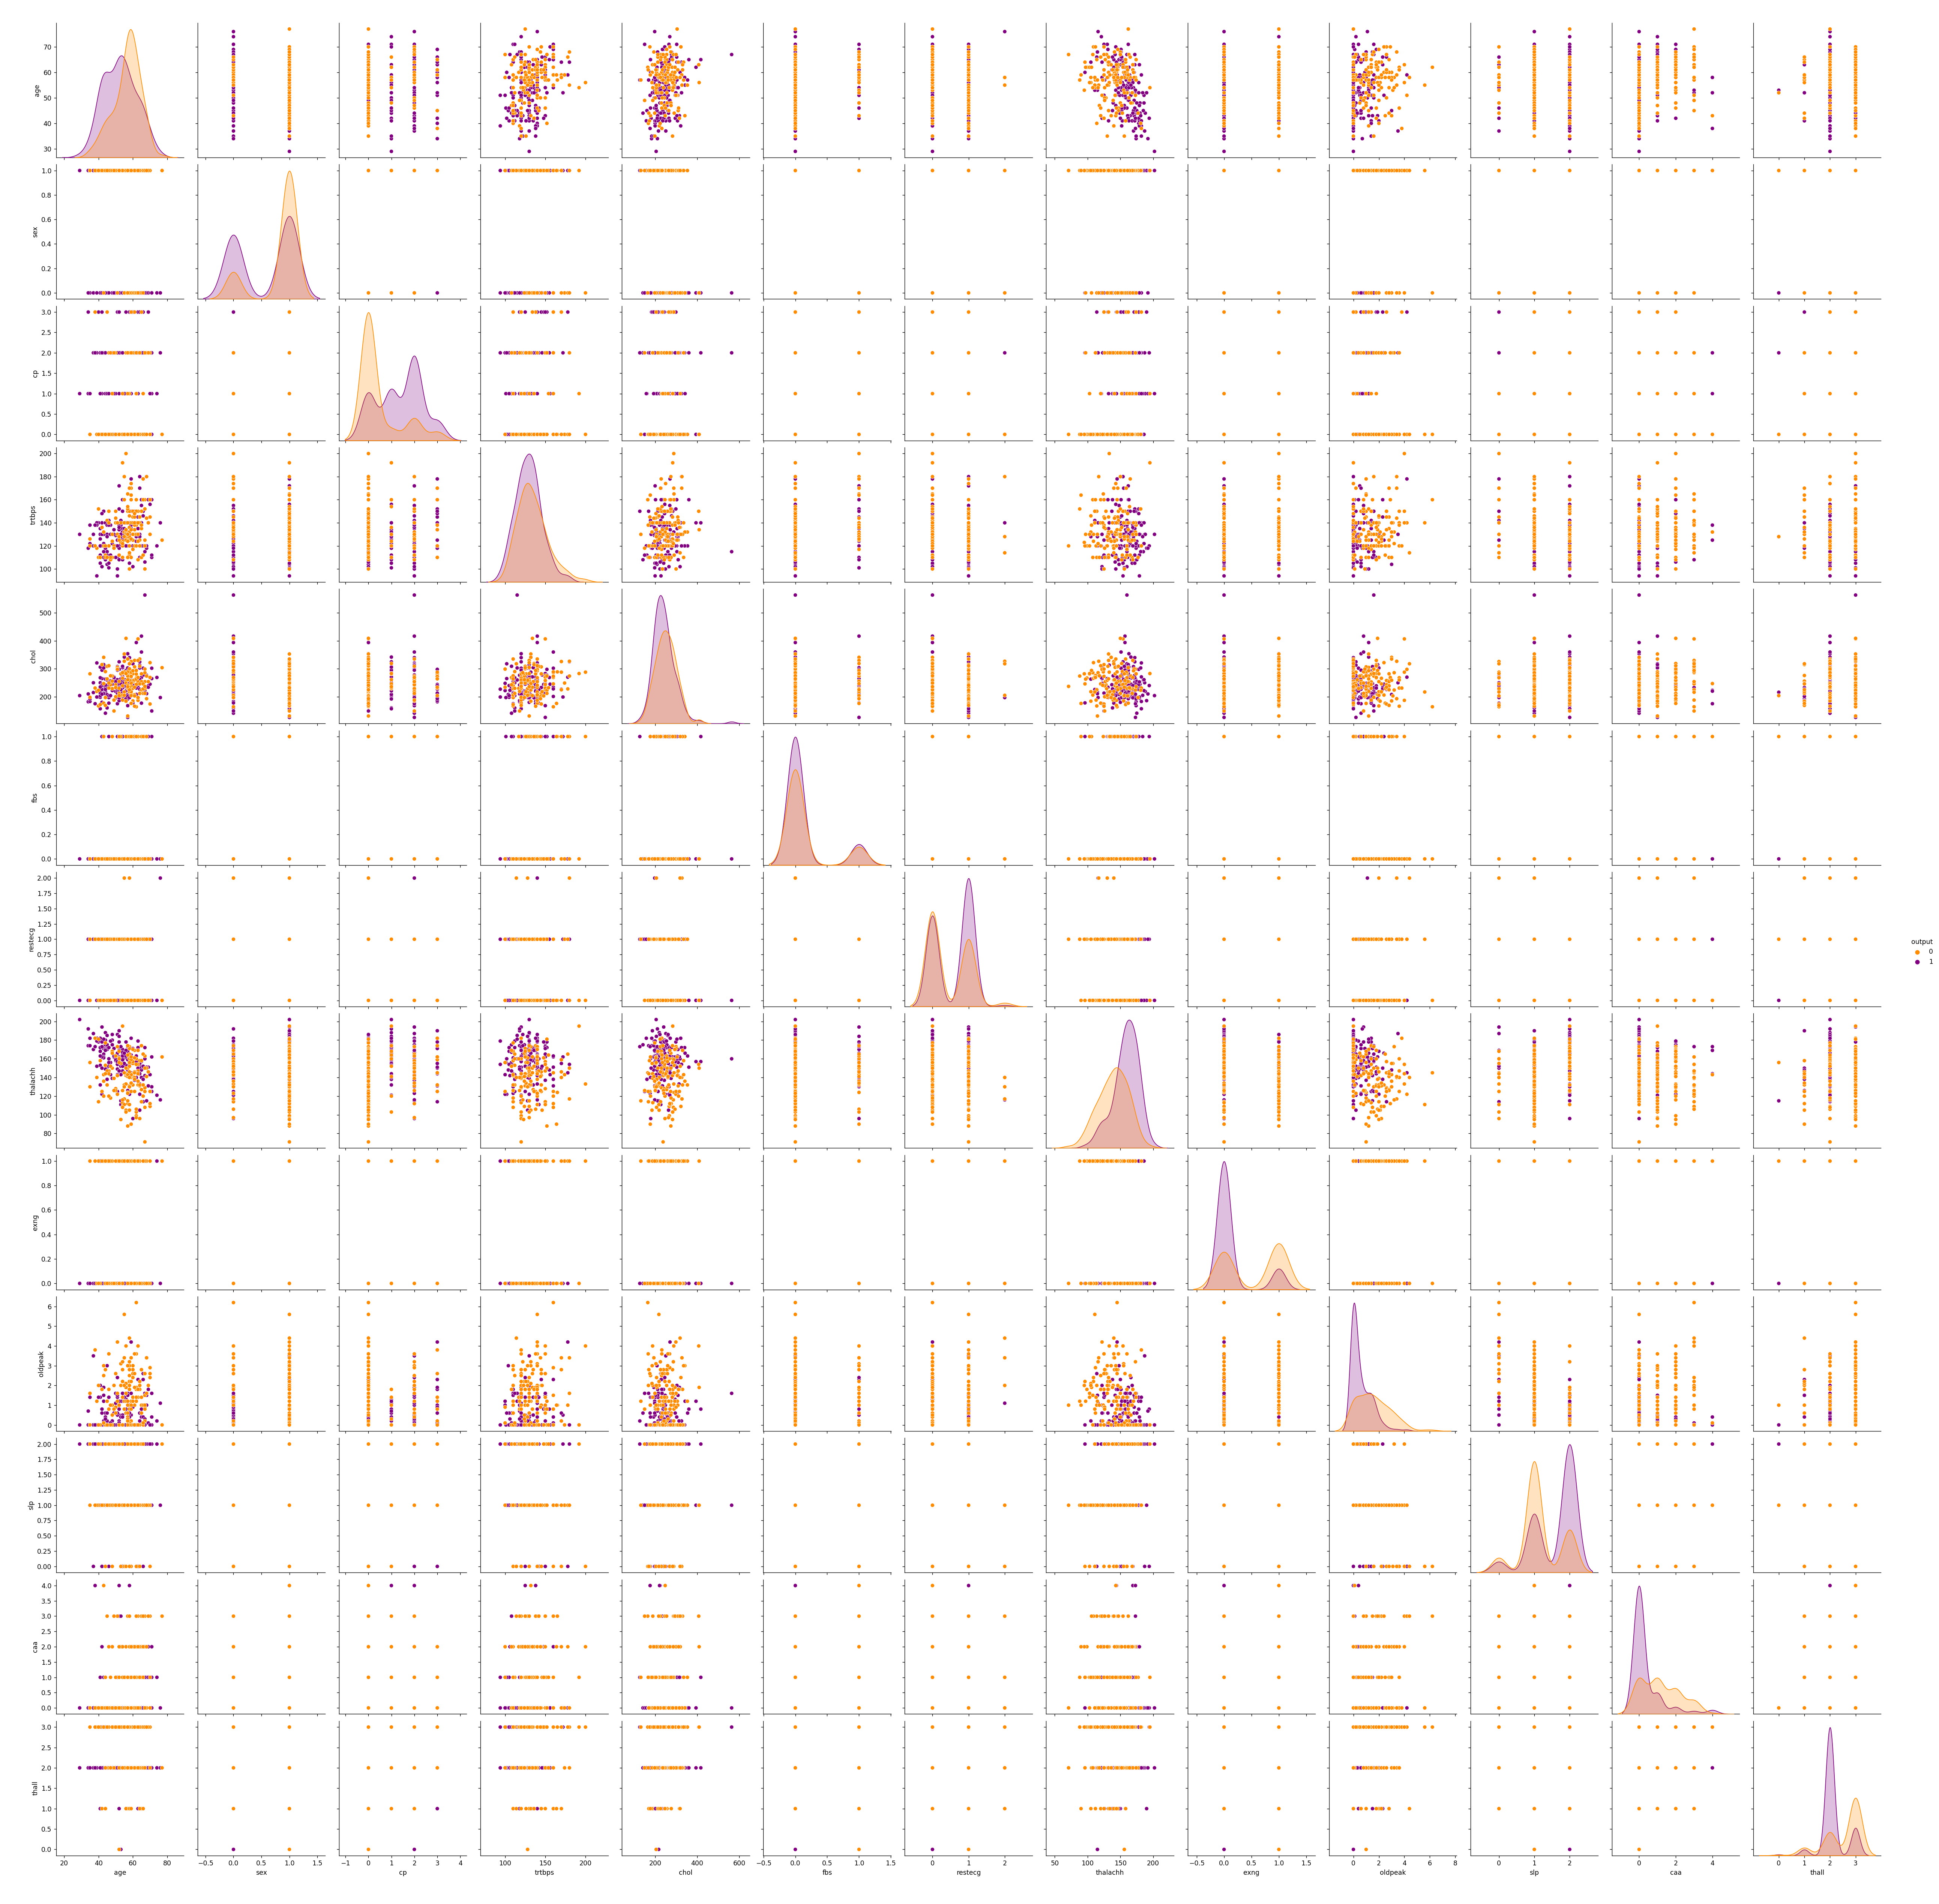

In [206]:
sns.pairplot(d,hue='output',palette = ["darkorange","purple"]) #pretstavuvanje na zavisnosta na karakteristikite vo parovi
plt.show()

<IPython.core.display.Javascript object>


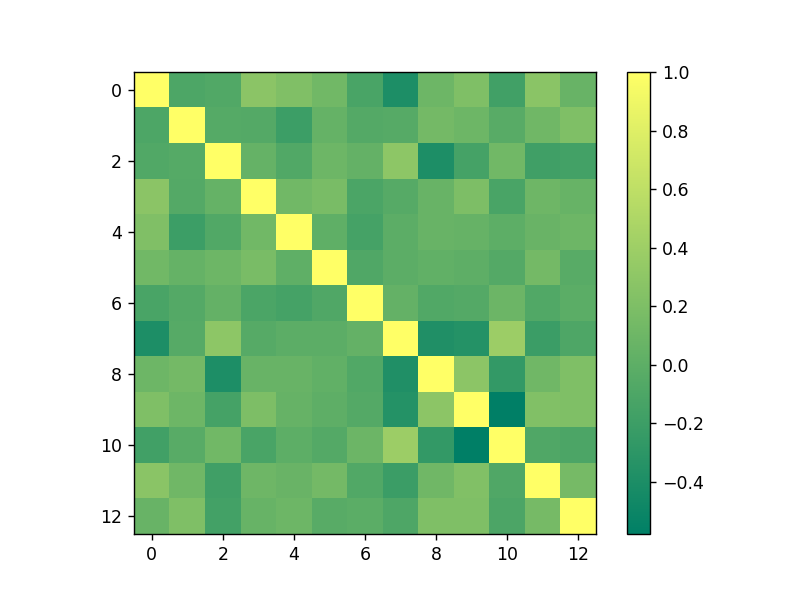

age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slp      -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thall     0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
output   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg  thalachh      exng   oldpeak       slp       caa  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trtbps   -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalachh  0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exng     -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slp       0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
caa      -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thall    -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
output    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

             thall    output  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trtbps    0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalachh -0.096439  0.421741  
exng      0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slp      -0.104764  0.345877  
caa       0.151832 -0.391724  
thall     1.000000 -0.344029  
output   -0.344029  1.000000

In [207]:
correlation_matrix = np.zeros((number_of_features,number_of_features))
for i in range(number_of_features): #Matricata na korelacija ke bidi od red 13x13, pri sto za sekoj par karakteristiki ja prikazuvame zavisnosta preku koeficientot na korelacija
    measure = X[:,i]
    for j in range(number_of_features):
        measure2 = X[:,j]
        corr, _ = stats.pearsonr(measure, measure2)
        correlation_matrix[i][j] = corr
plt.figure()
plt.imshow(correlation_matrix, cmap = "summer") 
plt.colorbar()
plt.show()

#istoto mozeme da go pretstavime i numericki vo tabela
d.corr()

### Parovi na features so povisok koeficient na korelacija

<IPython.core.display.Javascript object>


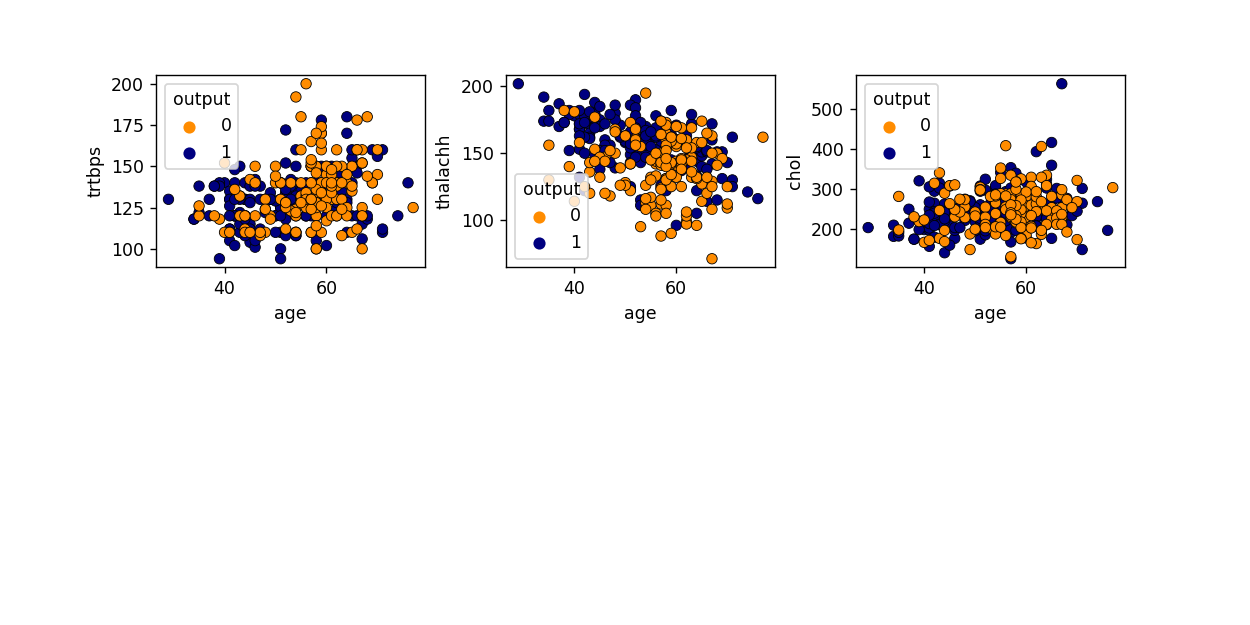

In [208]:
fig = plt.figure(figsize=(10, 5), facecolor="white")

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])

sns.scatterplot(data=d,x=d['age'],y=d['trtbps'],hue=d['output'],ec='black',ax=ax0,palette=colors)
sns.scatterplot(data=d,x=d['age'],y=d['thalachh'],hue=d['output'],ec='black',ax=ax1,palette=colors)
sns.scatterplot(data=d,x=d['age'],y=d['chol'],hue=d['output'],ec='black',ax=ax2,palette=colors)

plt.show()



### Reduciranje na dimenzionalnosta

<IPython.core.display.Javascript object>


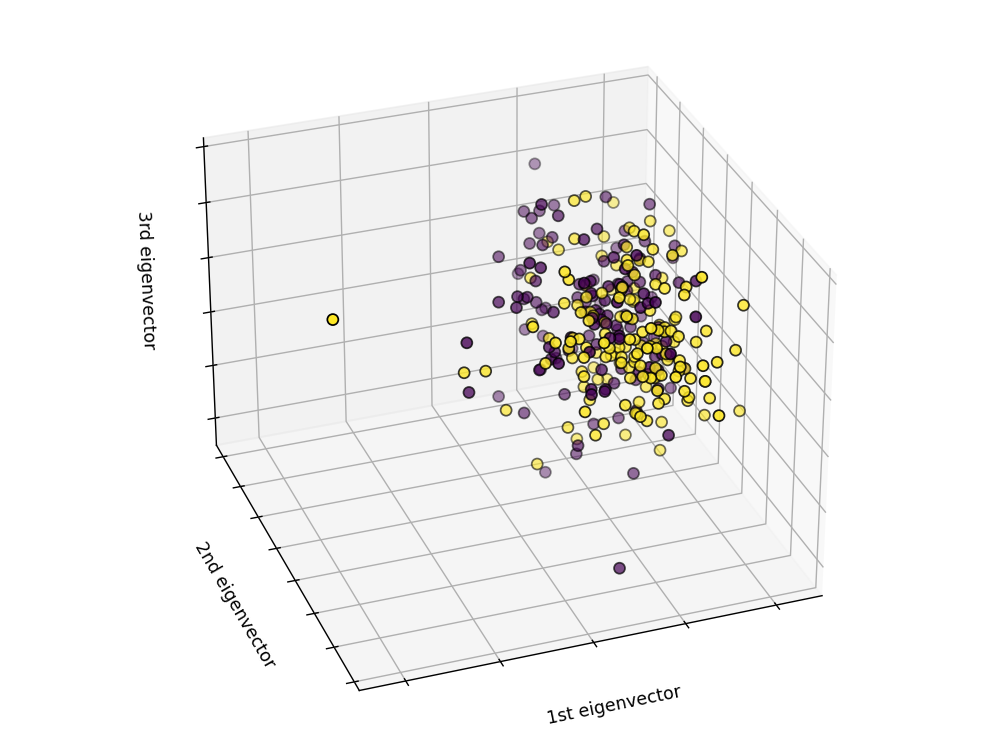

In [209]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

pca = PCA(n_components=3) #Setiranje na komponentite na 3 za da se pretstavi vo 3D prostor
X_reduced = pca.fit(X).transform(X) 
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.set_ylabel("2nd eigenvector")
ax.set_zlabel("3rd eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.show()

<IPython.core.display.Javascript object>


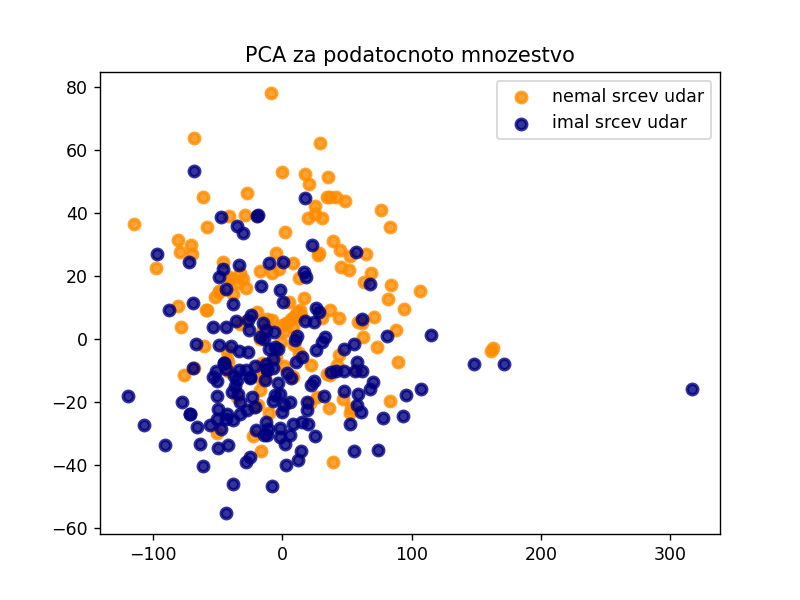

In [210]:
pca = PCA(n_components=2) #Setiranje na brojot na komponentite na 2 za da se pretstavi soodvetno vo 2D prostor 
X_PCA = pca.fit(X).transform(X)  

plt.figure() 
for color, i, target_name in zip(colors, [0,1], target_names):
    plt.scatter(X_PCA[y == i, 0], X_PCA[y == i, 1], color=color, alpha=.8, lw=2,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA za podatocnoto mnozestvo')
plt.show()

<IPython.core.display.Javascript object>


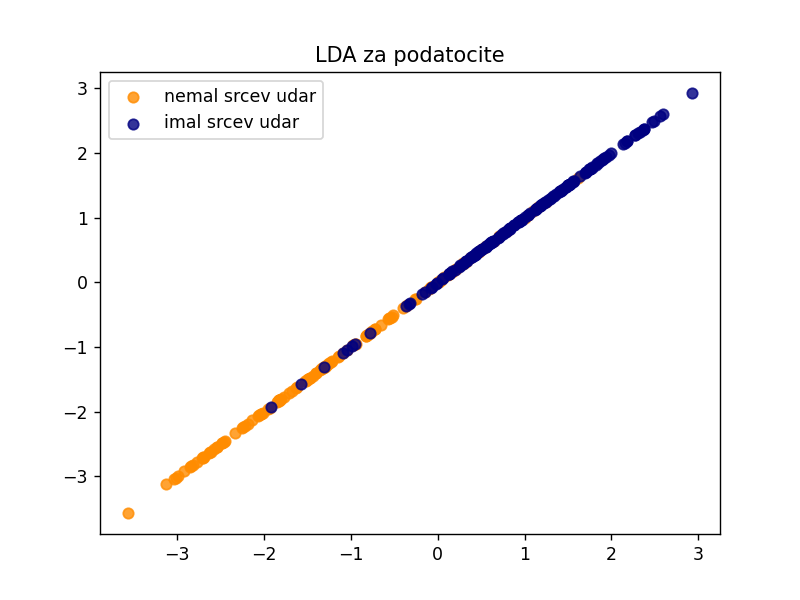

Text(0.5, 1.0, 'LDA za podatocite')

In [211]:
lda = LinearDiscriminantAnalysis(n_components=1) #Bidejki imame binarna klasifikacija brojot na komponenti mora da e brojot na klasi-1 sto znaci 1
X_LDA = lda.fit(X, y).transform(X)  

#Pri fituvanje na LDA modelot osven X matricata go naveduvame i y vektorot bidejki pretstavuva supervised (nadgleduvan) metod (dadeni ni se rezultatite)
plt.figure() 
for color, i, target_name in zip(colors, [0,1], target_names):
    plt.scatter(X_LDA[y == i, 0],X_LDA[y == i, 0], alpha=.8, color=color,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('LDA za podatocite')


In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42) #Go delime podatocnoto m-vo na train set i test set vo soodnos 70:30% za X i za y i koristime random state za sekogas isto da se deli m-voto
X_PCA_train, X_PCA_test, y_PCA_train, y_PCA_test = train_test_split(X_PCA, y, test_size=0.30, random_state=42) #Soodvetno istoto go pravime za PCA dataset-ot
X_LDA_train, X_LDA_test, y_LDA_train, y_LDA_test = train_test_split(X_LDA, y, test_size=0.30, random_state=42) #Isto taka i za LDA dataset-ot


In [213]:
#Naive Bayes model
gnb = GaussianNB() 
gnb.fit(X_train, y_train) #pravime inicijalizacija i fituvanje na modelot za train-setot
y_pred = gnb.predict(X_test) #pravime predikcija za test mnozestvoto
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3) #se presmetuva accuracy za modelot spored toa kolku primeroci od test setot sme pogodile podeleno so vkupniot broj primeroci od test setot zaokruzeno na 3 decimali
print("Tocnosta so Naive Bayes modelot za originalniot dataset e:", accuracy)

Tocnosta so Naive Bayes modelot za originalniot dataset e: 0.835


In [214]:
#LDA model
lda = LinearDiscriminantAnalysis() #pravime inicijalizacija na modelot
lda.fit(X_train, y_train) #fituvanje na modelot za train-setot
y_pred = lda.predict(X_test) #pravime predikcija za test mnozestvoto
accuracy = np.round(np.sum(y_test == y_pred)/len(y_test),3) #se presmetuva accuracy za modelot spored toa kolku primeroci od test setot sme pogodile podeleno so vkupniot broj primeroci od test setot zaokruzeno na 3 decimali

print("Tocnosta so LDA modelot za originalniot dataset e:", accuracy) 

Tocnosta so LDA modelot za originalniot dataset e: 0.802


<IPython.core.display.Javascript object>


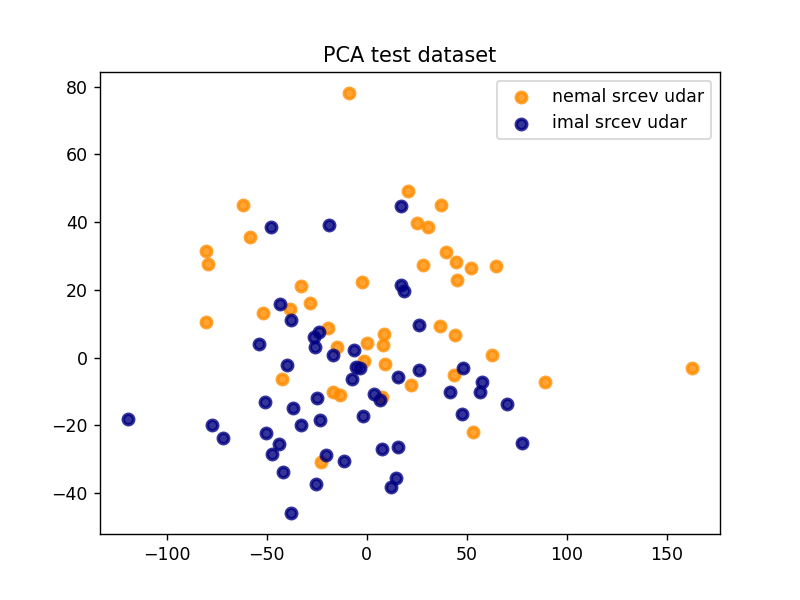

In [215]:
plt.figure() #Go prikazuvame so scatterplot grafik test datasetot koj ke ni koristi vo slednite nekolku predikcii za da gi pretstavime pogresno predvidenite primeroci 
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_PCA_test[y_PCA_test == i, 0], X_PCA_test[y_PCA_test == i, 1], color=color, alpha=.8, lw=2,
                label=target_name)
plt.legend(loc='best', shadow=False, scatterpoints=1)
plt.title('PCA test dataset')
plt.show()

Tocnosta so LDA modelot za PCA dataset-ot e: 0.758


<IPython.core.display.Javascript object>


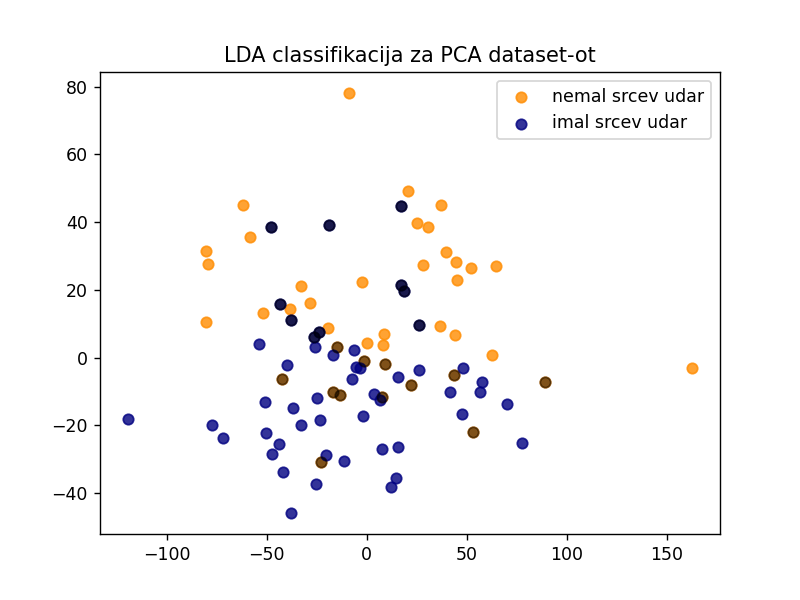

In [216]:
#Prvo pravime inicijalizacija na lda modelot,pa go fit-uvame na PCA training mnozestvoto i na kraj pravime predikcija za PCA test mnozestvoto so dopolnitelno presmetuvanje na accuracy
lda = LinearDiscriminantAnalysis()
lda.fit(X_PCA_train, y_PCA_train)
y_pred = lda.predict(X_PCA_test)
accuracy = np.round(np.sum(y_PCA_test == y_pred)/len(y_PCA_test),3)
print("Tocnosta so LDA modelot za PCA dataset-ot e:", accuracy)

plt.figure() #Prikaz na PCA test podatocite kako na pogorniot grafik za da gi pretstavime pogresno procenetite primeroci od test setot 
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_PCA_test[y_PCA_test == i, 0], X_PCA_test[y_PCA_test == i, 1], alpha=.8, color=color,
                label=target_name)
plt.title('LDA classifikacija za PCA dataset-ot')

#So crni tocki na grafikot gi pretstavuvame pogresnite predikcii taka sto gi zemame onie kade y_pred==y_PCA_test e False odnosno predikcijata ne se sovpagja so vistinskata vrednost za primerokot od test-setot 
incorrect = y_pred==y_PCA_test
for i in range(len(incorrect)):
    if(incorrect[i]==False):
        plt.scatter(X_PCA_test[i][0], X_PCA_test[i][1], alpha=.5, color="black")
plt.legend(loc='best', shadow=False, scatterpoints=1)

Tocnosta so Naive Bayes modelot za PCA dataset-ot e: 0.725


<IPython.core.display.Javascript object>


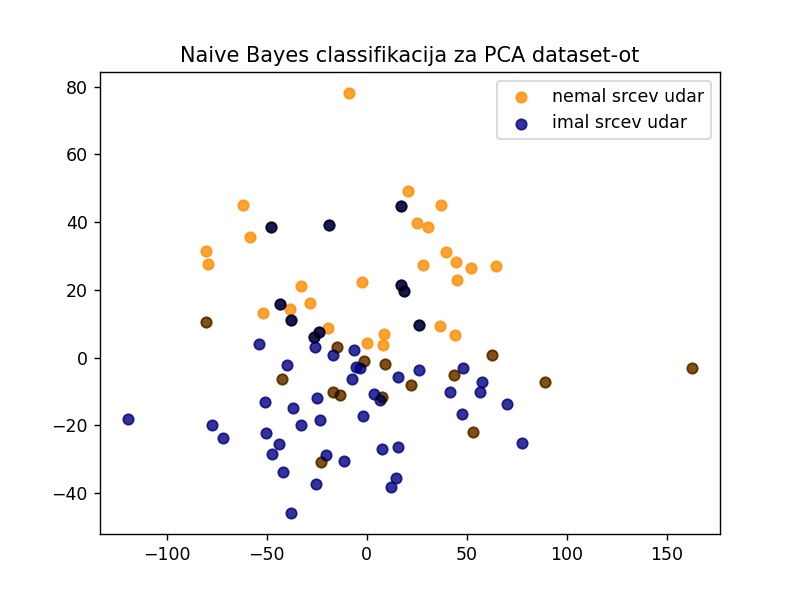

In [217]:
#Isto kako i prethodno, prvo pravime inicijalizacija na Naive Bayes modelot,pa go fit-uvame na PCA training mnozestvoto i na kraj pravime predikcija za PCA test mnozestvoto so dopolnitelno presmetuvanje na accuracy
gnb = GaussianNB()
gnb.fit(X_PCA_train, y_PCA_train)
y_pred = gnb.predict(X_PCA_test)
print("Tocnosta so Naive Bayes modelot za PCA dataset-ot e:", np.round(np.sum(y_PCA_test == y_pred)/len(y_PCA_test),3))

#Prikaz na test setot i pogresnite predikcii (so crni tocki) kako i prethodno
plt.figure()
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_PCA_test[y_PCA_test == i, 0], X_PCA_test[y_PCA_test == i, 1], alpha=.8, color=color,
                label=target_name)
plt.title('Naive Bayes classifikacija za PCA dataset-ot')

incorrect = y_pred==y_PCA_test
for i in range(len(incorrect)):
    if(incorrect[i]==False):
        plt.scatter(X_PCA_test[i][0], X_PCA_test[i][1], alpha=.5, color="black")
plt.legend(loc='best', shadow=False, scatterpoints=1)

Tocnosta so LDA modelot za LDA dataset-ot e: 0.857


<IPython.core.display.Javascript object>


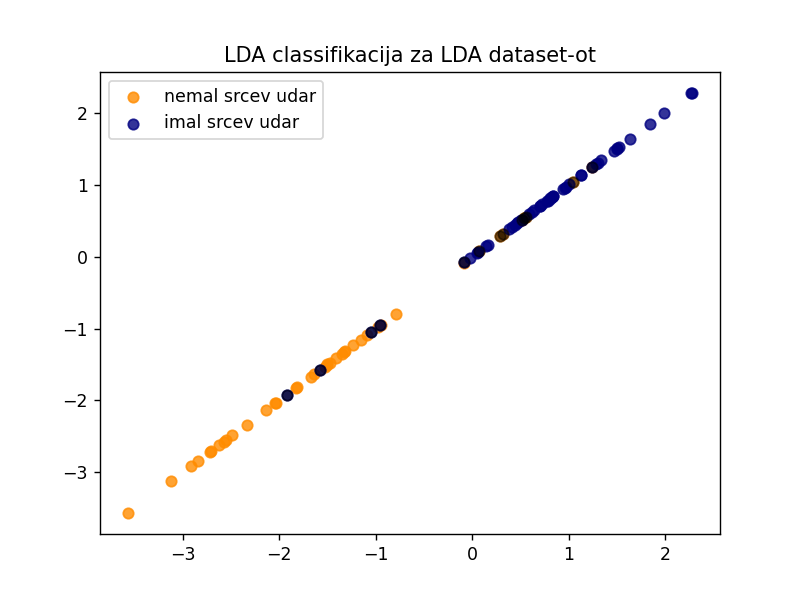

In [218]:
#Isto kako i prethodno, prvo pravime inicijalizacija na LDA modelot,pa go fit-uvame na LDA training mnozestvoto i na kraj pravime predikcija za LDA test mnozestvoto so dopolnitelno presmetuvanje na accuracy
lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
lda.fit(X_LDA_train, y_LDA_train)
y_pred = lda.predict(X_LDA_test)
print("Tocnosta so LDA modelot za LDA dataset-ot e:", np.round(np.sum(y_LDA_test == y_pred)/len(y_LDA_test),3))

#Prikaz na test setot i pogresnite predikcii (so crni tocki) kako i prethodno
plt.figure()
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_LDA_test[y_LDA_test == i, 0], X_LDA_test[y_LDA_test == i, 0], alpha=.8, color=color,
                label=target_name)
plt.title('LDA classifikacija za LDA dataset-ot')

incorrect = y_pred!=y_LDA_test
for i in range(len(incorrect)):
    if(incorrect[i]==True):
        plt.scatter(X_LDA_test[i][0], X_LDA_test[i][0], alpha=.5, color="black")
plt.legend(loc='best', shadow=False, scatterpoints=1)

Tocnosta so Naive Bayes modelot za LDA dataset-ot e: 0.857


<IPython.core.display.Javascript object>


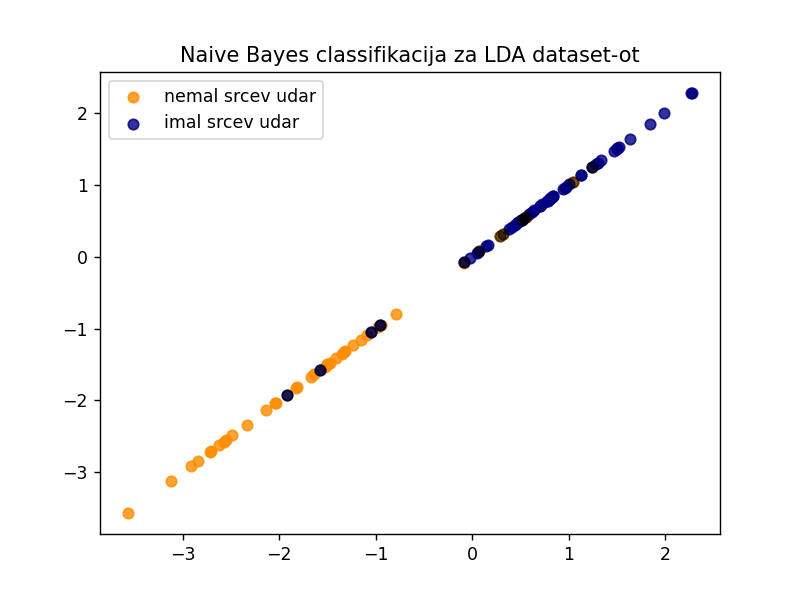

In [219]:
#Isto kako i prethodno, prvo pravime inicijalizacija na Naive Bayes modelot,pa go fit-uvame na LDA training mnozestvoto i na kraj pravime predikcija za LDA test mnozestvoto so dopolnitelno presmetuvanje na accuracy
gnb = GaussianNB()
gnb.fit(X_LDA_train, y_LDA_train)
y_pred = gnb.predict(X_LDA_test)
print("Tocnosta so Naive Bayes modelot za LDA dataset-ot e:", np.round(np.sum(y_LDA_test == y_pred)/len(y_LDA_test),3))

#Prikaz na test setot i pogresnite predikcii (so crni tocki) kako i prethodno
plt.figure()
for color, i, target_name in zip(colors, [0, 1], target_names):
    plt.scatter(X_LDA_test[y_LDA_test == i, 0], X_LDA_test[y_LDA_test == i, 0], alpha=.8, color=color,
                label=target_name)
plt.title('Naive Bayes classifikacija za LDA dataset-ot')

incorrect = y_pred!=y_LDA_test
for i in range(len(incorrect)):
    if(incorrect[i]==True):
        plt.scatter(X_LDA_test[i][0], X_LDA_test[i][0], alpha=.5, color="black")
plt.legend(loc='best', shadow=False, scatterpoints=1)

In [230]:
qda = QuadraticDiscriminantAnalysis()
model3 = qda.fit(X_train, y_train)
pred=model3.predict(X_test)
print("Tocnosta so QDA modelot za originalniot dataset-ot e:", np.round(np.sum(y_test == pred)/len(y_test),3))

Tocnosta so QDA modelot za originalniot dataset-ot e: 0.791


In [231]:
qda = QuadraticDiscriminantAnalysis()
model3 = qda.fit(X_PCA_train, y_PCA_train)
pred=model3.predict(X_PCA_test)
print("Tocnosta so QDA modelot za PCA dataset-ot e:", np.round(np.sum(y_PCA_test == pred)/len(y_PCA_test),3))

Tocnosta so QDA modelot za PCA dataset-ot e: 0.725


In [232]:
qda = QuadraticDiscriminantAnalysis()
model3 = qda.fit(X_LDA_train, y_LDA_train)
pred=model3.predict(X_LDA_test)
print("Tocnosta so QDA modelot za LDA dataset-ot e:", np.round(np.sum(y_LDA_test == pred)/len(y_LDA_test),3))

Tocnosta so QDA modelot za LDA dataset-ot e: 0.857


#### Od modelite moze da se zabelezi deka najgolema accuracy se dobiva so modelite vrz LDA podatocnoto mnozestvo, kade sto ima podobra separabilnost na klasite za razlika od modelite vrz PCA dimenzionalno reduciranoto mnozestvo.
#### Za originalniot dataset dobivame pogolema accuracy so Naive Bayes modelot, no sepak pomala odkolku so modelite za LDA dimenzionalno reduciranoto mnozestvo.